In [1]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# Load dataset 
(X_train, y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()


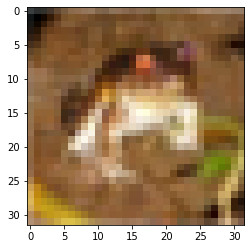

In [3]:
# Visualize a sample image
plt.imshow(X_train[0],cmap='gray');

In [4]:
# check out the shape of the training data
X_train.shape

(50000, 32, 32, 3)

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [6]:
X_train= rgb2gray(X_train)

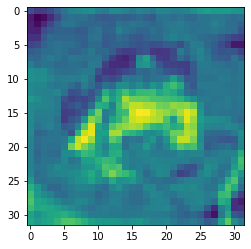

In [7]:
plt.imshow(X_train[0]);

In [8]:
# check out the shape of the testing data
X_train.shape

(50000, 32, 32)

In [9]:
X_test= rgb2gray(X_test)

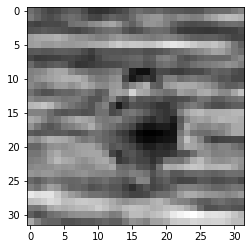

In [10]:
# Let's view some images!
i=random.randint(1,50000)
plt.imshow(X_train[i],cmap='gray');

In [11]:
label= y_train[i]
label


array([2], dtype=uint8)

C:\Users\HP\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


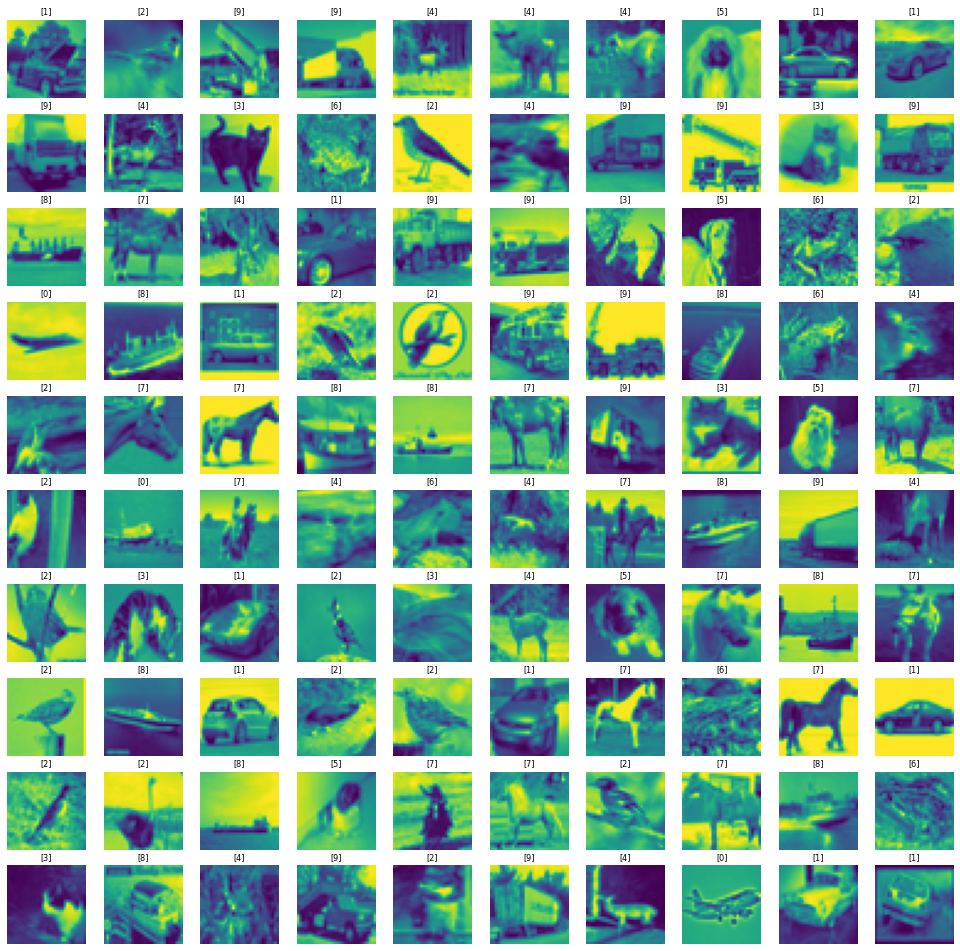

In [12]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training 
for i in np.arange(0,W_grid * L_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize= 8)
    axes[i].axis('off')




In [13]:
# normalize data
X_train=X_train/255
X_test= X_test/255

In [14]:
X_train

array([[[0.24747843, 0.18172157, 0.19340392, ..., 0.5501098 ,
         0.52357255, 0.5171451 ],
        [0.07609412, 0.        , 0.03952157, ..., 0.3778549 ,
         0.35883137, 0.3755098 ],
        [0.09641961, 0.03487451, 0.12412549, ..., 0.35996078,
         0.36230588, 0.31956863],
        ...,
        [0.68943529, 0.60708235, 0.61746275, ..., 0.53329804,
         0.14097647, 0.15170588],
        [0.58524314, 0.5097098 , 0.56651765, ..., 0.60952157,
         0.27565882, 0.23852549],
        [0.60452941, 0.54702353, 0.58589412, ..., 0.7558902 ,
         0.49612157, 0.39666275]],

       [[0.69361961, 0.5399098 , 0.41616863, ..., 0.36548235,
         0.34928235, 0.31861961],
        [0.62790588, 0.60918431, 0.50094902, ..., 0.38450588,
         0.3094549 , 0.28574118],
        [0.61357255, 0.58321176, 0.46281569, ..., 0.31753333,
         0.27192941, 0.2684549 ],
        ...,
        [0.68336471, 0.62777255, 0.64488627, ..., 0.14784314,
         0.22571765, 0.35149804],
        [0.6

In [15]:
# add some noise
noise_factor= 0.2

noise_dataset=[]

for img in X_train:
    noisy_image = img + noise_factor *np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image,0,1)
    noise_dataset.append(noisy_image)

In [16]:
noise_dataset= np.array(noise_dataset)

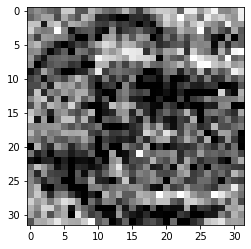

In [17]:
plt.imshow(noise_dataset[14],cmap='gray');

In [18]:
noise_factor = 0.2
noise_test_dataset = []
for img in X_test:
    noisy_image = img + noise_factor * np.random.randn (*img.shape)
    noisy_image = np.clip(noisy_image,0,1)
    noise_test_dataset.append(noisy_image)

In [19]:
# add noise to testing dataset
noise_test_dataset = np.array(noise_test_dataset)

In [20]:
autoencoder = tf.keras.models.Sequential()
#Encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = 3,strides= 2, padding = 'same', input_shape = (32,32,1),activation = 'elu'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3,strides= 2, padding = 'same',activation = 'elu' ))

autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = 3,strides= 1, padding = 'same',activation = 'elu'))

#Decoder

autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16, kernel_size = 3,strides= 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = 3,strides= 2, padding = 'same' ,activation = 'sigmoid'))



In [21]:
autoencoder.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [22]:
autoencoder.fit(noise_dataset.reshape(-1, 32, 32, 1),
               X_train.reshape(-1, 32, 32, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 32, 32, 1 ), X_test.reshape(-1, 32, 32, 1)))

Epoch 1/10
250/250 [==============================] - 21s 83ms/step - loss: 0.0211 - val_loss: 0.0107
Epoch 2/10
250/250 [==============================] - 20s 81ms/step - loss: 0.0096 - val_loss: 0.0088
Epoch 3/10
250/250 [==============================] - 21s 85ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 4/10
250/250 [==============================] - 21s 84ms/step - loss: 0.0082 - val_loss: 0.0081
Epoch 5/10
250/250 [==============================] - 20s 81ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 6/10
250/250 [==============================] - 20s 82ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 7/10
250/250 [==============================] - 20s 81ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 8/10
250/250 [==============================] - 20s 82ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 9/10
250/250 [==============================] - 21s 84ms/step - loss: 0.0076 - val_loss: 0.0076
Epoch 10/10
250/250 [==============================] - 21s 82ms/step - loss: 0.007

In [23]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1,32,32,1),X_test.reshape(-1,32,32,1))
print('Test loss : {:3f}'.format(evaluation))

313/313 [==============================] - 3s 9ms/step - loss: 0.0074
Test loss : 0.007449


In [24]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1,32,32,1))

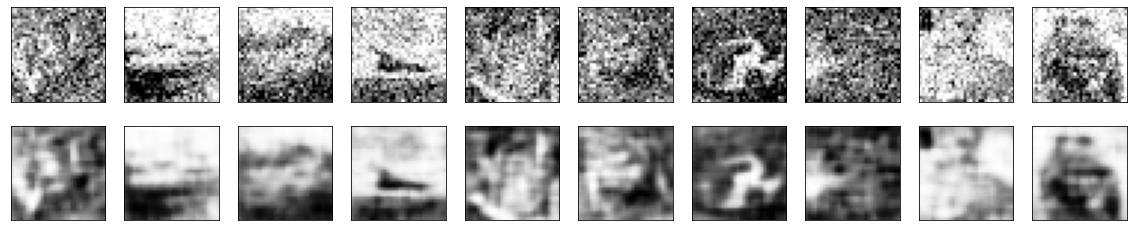

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_dataset[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)